In [ ]:
# 퇴직 예측을 할때는 랜포는 별로고, 라이트GBM을 써볼 것

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [151]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [125]:
# dataset 불러오기
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

In [171]:
# 범주형 변수를 제외한 데이터
train_set = train.drop(['fiberID','type'],  axis=1)
train_set.head()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [173]:
# 연속형 변수 데이터에서 OUTLIER를 제거한 데이터, 그리고 OUTLIER 데이터 분리
from scipy import stats
train_outL = train_set[(np.abs(stats.zscore(train_set)) >= 3).all(axis=1)]
train_NoutL = train_set[(np.abs(stats.zscore(train_set)) < 3).all(axis=1)]

In [ ]:
corr = train_NoutL.corr(method='pearson')

f = plt.figure(figsize=(20, 16))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(train_NoutL.shape[1]), train_NoutL.columns, fontsize=10, rotation=90)
plt.yticks(range(train_NoutL.shape[1]), train_NoutL.columns, fontsize=10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

#plt.title('Correlation Matrix', fontsize=16);

<Figure size 1512x360 with 0 Axes>

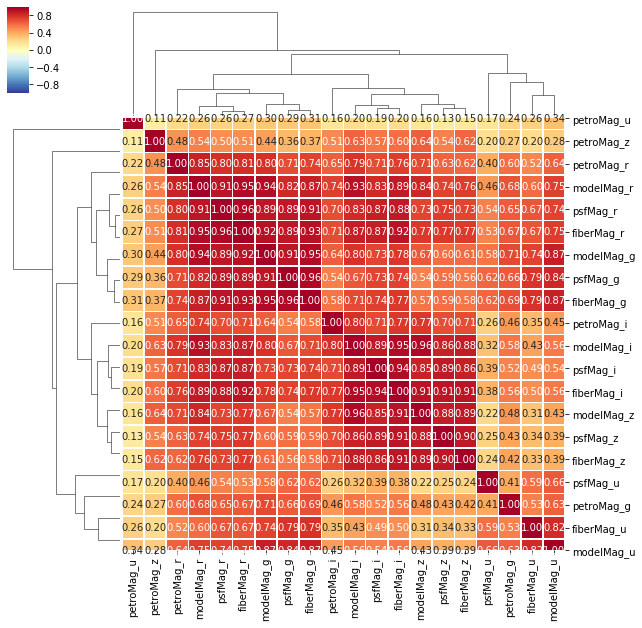

In [17]:
import seaborn as sns 


corr = train_NoutL.drop(['id'],axis=1).corr(method='pearson')
# sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.figure(figsize=(21,5))
sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               fmt = '.2f',
               linewidths=.5,
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

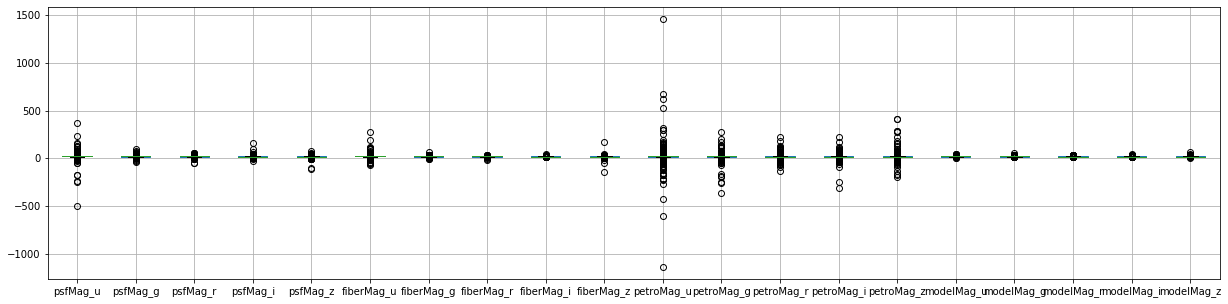

In [20]:
plt.figure(figsize=(21,5))
train_NoutL.drop(['id'], axis=1).boxplot()

In [11]:
# psfMag_u
# fiberMag_u
# petroMag_u
train_NoutL_t = pd.merge(train_NoutL, train[['id','type']], how='left', on='id')
train_outL_t = pd.merge(train_outL, train[['id','type']], how='left', on='id')

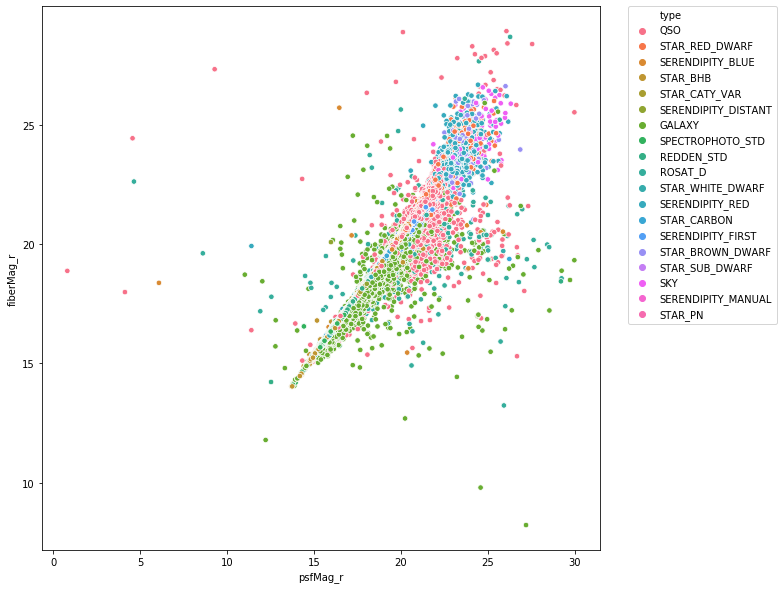

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='psfMag_r', y='fiberMag_r', 
                s=30, # marker size
                hue='type',
                #data=train_NoutL_t)
                data=train_NoutL_t.loc[(train_NoutL_t['psfMag_r'] > 0) & (train_NoutL_t['psfMag_r'] < 30) & (train_NoutL_t['fiberMag_r'] > 0) & (train_NoutL_t['fiberMag_r'] < 30)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

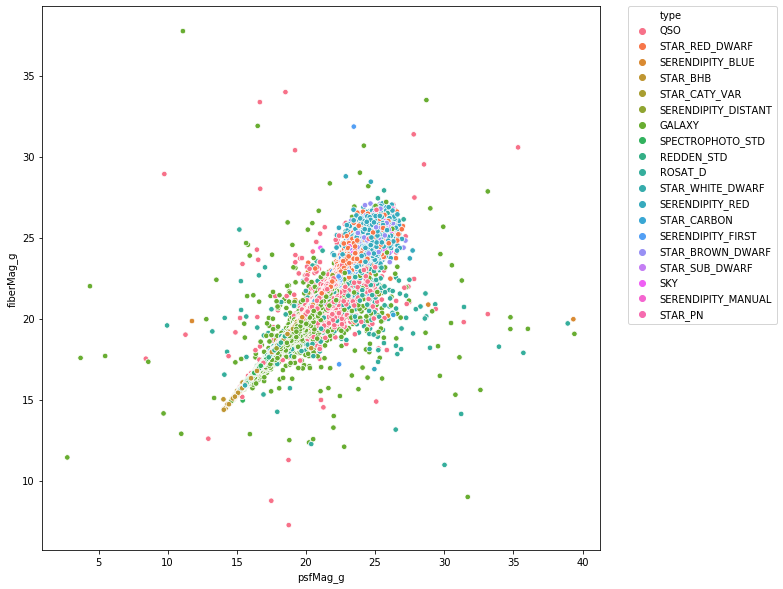

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='psfMag_g', y='fiberMag_g', 
                s=30, # marker size
                hue='type',
                # data=train_NoutL_t)
                data=train_NoutL_t.loc[(train_NoutL_t['psfMag_g'] > 0) & (train_NoutL_t['psfMag_g'] < 40) & (train_NoutL_t['fiberMag_g'] > 0) & (train_NoutL_t['fiberMag_g'] < 40)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [158]:
train.columns

Index(['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z'], dtype='object')

In [174]:
train_NoutL_t = pd.merge(train_NoutL, train[['id','type','fiberID']], how='left', on='id')

In [175]:
train_nIDX = train_NoutL_t.drop(['id','type'], axis=1)
train_nIDX['fiberID'] = train_nIDX['fiberID'].astype(str)
train_ohe = pd.get_dummies(train_nIDX, prefix='', prefix_sep='')

In [186]:
train_ohe.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,1,10,100,1000,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,197,198,199,2,20,200,201,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,231,232,233,234,235,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,25,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,29,290,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,...,774,775,776,777,778,779,78,780,781,782,783,784,785,786,787,788,789,79,790,791,792,793,794,795,796,797,798,799,8,80,800,801,802,803,804,805,806,807,808,809,81,810,811,812,813,814,815,816,817,818,819,82,820,821,822,823,824,825,826,827,828,829,83,830,831,832,833,834,835,836,837,838,839,84,840,841,842,843,844,845,846,847,848,849,85,850,851,852,853,854,855,856,857,858,859,86,860,861,862,863,864,865,866,867,868,869,87,870,871,872,873,874,875,876,877,878,879,88,880,881,882,883,884,885,886,887,888,889,89,890,891,892,893,894,895,896,897,898,899,9,90,900,901,902,903,904,905,906,907,908,909,91,910,911,912,913,914,915,916,917,918,919,92,920,921,922,923,924,925,926,927,928,929,93,930,931,932,933,934,935,936,937,938,939,94,940,941,942,943,944,945,946,947,948,949,95,950,951,952,953,954,955,956,957,958,959,96,960,961,962,963,964,965,966,967,968,969,97,970,971,972,973,974,975,976,977,978,979,98,980,981,982,983,984,985,986,987,988,989,99,990,991,992,993,994,995,996,997,998,999
0,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [177]:
from sklearn.model_selection import train_test_split
y = train_NoutL_t['type']
X = train_ohe

X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.3, 
                        random_state=1,
                        stratify=y)

In [178]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [145]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=4)

forest.fit(X_train_norm, y_train)

y_train_pred = forest.predict(X_train_norm)
y_test_pred = forest.predict(X_test_norm)

forest_train = accuracy_score(y_train, y_train_pred)
forest_test = accuracy_score(y_test, y_test_pred)
print('랜덤 포레스트의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (forest_train, forest_test))

랜덤 포레스트의 훈련 정확도/테스트 정확도 1.000/0.829


In [183]:
test_nIDX = test.drop(['id'], axis=1)
test_nIDX['fiberID'] = test_nIDX['fiberID'].astype(str)
test_ohe = pd.get_dummies(test_nIDX, prefix='', prefix_sep='')

In [184]:
col_add = set(train_ohe.columns.array) - set(test_ohe.columns.array)
test_ohe_f = pd.concat([test_ohe, pd.DataFrame(columns = col_add)]) 
test_ohe_f = test_ohe_f.fillna(0.0)

C:\Users\LGCNS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [189]:
set(test_ohe.columns.array) - set(train_ohe.columns.array)

{'GALAXY', 'QSO', 'ROSAT_D', 'SERENDIPITY_DISTANT', 'STAR_BHB'}

In [185]:
test_ohe_norm = mms.transform(test_ohe_f)

ValueError: operands could not be broadcast together with shapes (10009,1025) (1020,) (10009,1025) 

In [167]:
test_pred = forest.predict(test_ohe_norm)
test_f = test
test_f['type'] = test_pred

In [168]:
pd.DataFrame(test_pred).head(20)

,0
0,STAR_BHB
1,STAR_BHB
2,STAR_BHB
3,STAR_BHB
4,STAR_BHB
5,STAR_BHB
6,STAR_BHB
7,STAR_BHB
8,STAR_BHB
9,STAR_BHB


In [169]:
result_df = makeSUBMITCSV(test)
result_df.to_csv('./data/submit.csv', sep=',', index=False)

KeyError: "['STAR_BROWN_DWARF', 'SPECTROPHOTO_STD', 'STAR_WHITE_DWARF', 'STAR_SUB_DWARF', 'STAR_CARBON', 'SERENDIPITY_BLUE', 'STAR_RED_DWARF', 'SERENDIPITY_FIRST', 'SERENDIPITY_RED', 'STAR_CATY_VAR', 'REDDEN_STD', 'SKY'] not in index"

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (tree_train, tree_test))

결정 트리의 훈련 정확도/테스트 정확도 0.404/0.404
에이다부스트의 훈련 정확도/테스트 정확도 0.285/0.285


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('에이다부스트의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (ada_train, ada_test))

In [69]:
# make RESULT to SUBMIT CSV FILE
def makeSUBMITCSV(df):
    df = df[['id','type']]
    result = pd.get_dummies(df, prefix='', prefix_sep='')
    result['SERENDIPITY_MANUAL']=0
    result['STAR_PN']=0
    result = result[['id', 'STAR_WHITE_DWARF', 'STAR_CATY_VAR', 'STAR_BROWN_DWARF', 'SERENDIPITY_RED', 'REDDEN_STD', 'STAR_BHB', 'GALAXY', 'SERENDIPITY_DISTANT', 'QSO', 'SKY', 'STAR_RED_DWARF', 'ROSAT_D', 'STAR_PN', 'SERENDIPITY_FIRST', 'STAR_CARBON', 'SPECTROPHOTO_STD', 'STAR_SUB_DWARF', 'SERENDIPITY_MANUAL', 'SERENDIPITY_BLUE']]
    return result

In [71]:
from sklearn.metrics import log_loss

log_loss(y_test, y_test_pred, eps=1e-15)

ValueError: could not convert string to float: 'GALAXY'